<a href="https://colab.research.google.com/github/riiii-bit43/data-science/blob/main/EduTask1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Credit Banking_Project - 1.xls to Credit Banking_Project - 1.xls


In [ ]:
import pandas as pd

# If it's a .xls file, install xlrd first:
!pip install xlrd

# Load the file
df = pd.read_excel("Credit Banking_Project - 1.xls")

# Preview the data
df.head()


,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.559307,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary


In [ ]:
import pandas as pd

# Already loaded in your case:
df = pd.read_excel("Credit Banking_Project - 1.xls")

# Check the column names and data types
df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Sl No:               100 non-null    int64  
 1   Customer             100 non-null    object 
 2   Age                  100 non-null    float64
 3   City                 100 non-null    object 
 4   Credit Card Product  100 non-null    object 
 5   Limit                100 non-null    int64  
 6   Company              100 non-null    object 
 7   Segment              100 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.4+ KB


,Sl No:,Customer,Age,City,Credit Card Product,Limit,Company,Segment
0,1,A1,0.928521,BANGALORE,Gold,500000,C1,Self Employed
1,2,A2,35.534551,CALCUTTA,Silver,100000,C2,Salaried_MNC
2,3,A3,11.559307,COCHIN,Platimum,10000,C3,Salaried_Pvt
3,4,A4,45.820278,BOMBAY,Platimum,10001,C4,Govt
4,5,A5,69.663948,BANGALORE,Platimum,10002,C5,Normal Salary


In [ ]:
print(df.columns.tolist())

['Sl No:', 'Customer', 'Age', 'City', 'Credit Card Product', 'Limit', 'Company', 'Segment']


In [ ]:
import pandas as pd

# Load the entire Excel file
xls = pd.ExcelFile("Credit Banking_Project - 1.xls")

# See all sheet names
print(xls.sheet_names)


['Customer Acqusition', 'Spend', 'Repayment']


In [ ]:
xls = pd.ExcelFile("Credit Banking_Project - 1.xls")
print(xls.sheet_names)

['Customer Acqusition', 'Spend', 'Repayment']


In [ ]:
df_customers = pd.read_excel(xls, sheet_name="Customer Acqusition")
df_spend = pd.read_excel(xls, sheet_name="Spend")
df_repay = pd.read_excel(xls, sheet_name="Repayment")


print(df_customers.head())
print(df_spend.head())
print(df_repay.head())


   Sl No: Customer        Age       City Credit Card Product   Limit Company  \
0       1       A1   0.928521  BANGALORE                Gold  500000      C1   
1       2       A2  35.534551   CALCUTTA              Silver  100000      C2   
2       3       A3  11.559307     COCHIN            Platimum   10000      C3   
3       4       A4  45.820278     BOMBAY            Platimum   10001      C4   
4       5       A5  69.663948  BANGALORE            Platimum   10002      C5   

         Segment  
0  Self Employed  
1   Salaried_MNC  
2   Salaried_Pvt  
3           Govt  
4  Normal Salary  
   Sl No: Costomer      Month       Type         Amount
0       1       A1 2004-01-12  JEWELLERY  473775.834869
1       2       A1 2004-01-03      PETRO  335578.666019
2       3       A1 2004-01-15    CLOTHES  371040.941912
3       4       A1 2004-01-25       FOOD  141177.813256
4       5       A1 2005-01-17     CAMERA  398403.771812
   SL No: Costomer      Month         Amount
0       1       A1 2004-

In [ ]:
df_customers = df_customers[df_customers['Age'] >= 18]


In [ ]:
df_spend['Month'] = pd.to_datetime(df_spend['Month']).dt.to_period('M')
df_repay['Month'] = pd.to_datetime(df_repay['Month']).dt.to_period('M')


In [ ]:
monthly_spend = df_spend.groupby(['Costomer', 'Month'])['Amount'].sum().reset_index()
monthly_spend.rename(columns={'Amount': 'Amount_Spent'}, inplace=True)

In [ ]:
monthly_repay = df_repay.groupby(['Costomer', 'Month'])['Amount'].sum().reset_index()
monthly_repay.rename(columns={'Amount': 'Amount_Repaid'}, inplace=True)


In [ ]:
df_merged = pd.merge(monthly_spend, monthly_repay, on=['Costomer', 'Month'], how='outer')
df_merged.fillna(0, inplace=True)


In [ ]:
df_merged['Due'] = df_merged['Amount_Spent'] - df_merged['Amount_Repaid']
df_merged['Due'] = df_merged['Due'].apply(lambda x: x if x > 0 else 0)
df_merged['Interest'] = df_merged['Due'] * 0.029


In [ ]:
monthly_profit = df_merged.groupby('Month')['Interest'].sum().reset_index()
monthly_profit.rename(columns={'Interest': 'Monthly_Profit'}, inplace=True)

print(monthly_profit)


      Month  Monthly_Profit
0   2004-01   577723.308202
1   2004-02   179315.885641
2   2004-03    91546.513730
3   2004-04   139859.166924
4   2004-05    82054.695624
5   2004-09    91544.371589
6   2004-11    95829.677364
7   2005-01   164964.788671
8   2005-02   370686.166216
9   2005-04   142960.570603
10  2005-05   291676.623170
11  2005-06   205566.639139
12  2005-07    59396.423760
13  2005-08   158686.681372
14  2005-09    74482.093215
15  2005-10    67811.872156
16  2005-11   248955.680944
17  2005-12    71185.390211
18  2006-01    84424.371972
19  2006-02   199521.382500
20  2006-03   480587.306377
21  2006-04   406504.790904
22  2006-05   182230.987848
23  2006-06   104225.138552
24  2006-07   172635.030083
25  2006-08    64692.969671
26  2006-09    92836.418242
27  2006-10    78690.039876
28  2006-11   170797.914505
29  2006-12    77000.673581


In [ ]:
top_customers = df_merged.groupby('Costomer')['Amount_Spent'].sum().nlargest(10).reset_index()

print(top_customers)


  Costomer  Amount_Spent
0      A22  9.637819e+06
1      A40  9.595040e+06
2      A60  9.317672e+06
3      A61  9.148468e+06
4      A48  9.056652e+06
5      A42  8.665639e+06
6      A41  8.583532e+06
7      A39  8.526678e+06
8      A45  8.498612e+06
9      A13  8.042339e+06


In [ ]:
df_merged.rename(columns={'Costomer': 'Customer'}, inplace=True)


df_final = pd.merge(df_merged, df_customers, on='Customer', how='left')

print(df_final.head())


  Customer    Month  Amount_Spent  Amount_Repaid            Due      Interest  \
0       A1  2004-01  1.511173e+06   1.362775e+06  148397.511160   4303.527824   
1       A1  2004-02  4.138111e+04   1.911800e+05       0.000000      0.000000   
2       A1  2004-05  1.311966e+05   0.000000e+00  131196.587818   3804.701047   
3       A1  2005-01  3.984038e+05   1.581970e+03  396821.801983  11507.832258   
4       A1  2005-02  1.404193e+06   1.199808e+06  204385.417375   5927.177104   

   Sl No:  Age City Credit Card Product  Limit Company Segment  
0     NaN  NaN  NaN                 NaN    NaN     NaN     NaN  
1     NaN  NaN  NaN                 NaN    NaN     NaN     NaN  
2     NaN  NaN  NaN                 NaN    NaN     NaN     NaN  
3     NaN  NaN  NaN                 NaN    NaN     NaN     NaN  
4     NaN  NaN  NaN                 NaN    NaN     NaN     NaN  


In [ ]:
segment_spend = df_final.groupby('Segment')['Amount_Spent'].sum().reset_index()
print(segment_spend)


         Segment  Amount_Spent
0           Govt  6.046714e+07
1  Normal Salary  7.343411e+07
2   Salaried_MNC  5.487624e+07
3   Salaried_Pvt  4.865442e+07
4  Self Employed  5.048681e+07


In [ ]:
bins = [18, 30, 45, 60, 100]
labels = ['18-29', '30-44', '45-59', '60+']
df_final['Age_Group'] = pd.cut(df_final['Age'], bins=bins, labels=labels)

age_spend = df_final.groupby('Age_Group')['Amount_Spent'].sum().reset_index()
print(age_spend)


  Age_Group  Amount_Spent
0     18-29  4.608874e+07
1     30-44  4.448938e+07
2     45-59  6.324542e+07
3       60+  1.340952e+08


/tmp/ipython-input-21-1475748608.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_spend = df_final.groupby('Age_Group')['Amount_Spent'].sum().reset_index()


In [ ]:
category_spend = df_spend.groupby('Type')['Amount'].sum().reset_index()
category_spend.rename(columns={'Amount': 'Total_Spent'}, inplace=True)

print(category_spend)


            Type   Total_Spent
0     AIR TICKET  3.743547e+07
1           AUTO  1.050509e+07
2           BIKE  1.315264e+07
3     BUS TICKET  2.490590e+07
4         CAMERA  4.372101e+07
5            CAR  7.018278e+06
6        CLOTHES  2.479110e+07
7           FOOD  3.829646e+07
8      JEWELLERY  2.524795e+07
9   MOVIE TICKET  1.878458e+07
10         PETRO  5.102258e+07
11        RENTAL  2.091467e+07
12       SANDALS  6.325017e+06
13      SHOPPING  2.741868e+07
14  TRAIN TICKET  3.181262e+07


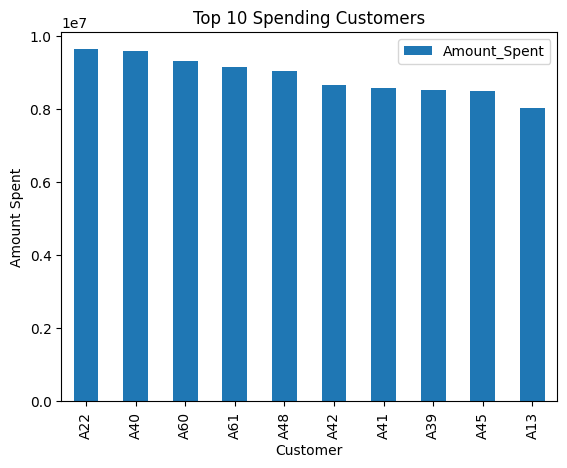

In [ ]:
import matplotlib.pyplot as plt

top_customers.plot(kind='bar', x='Costomer', y='Amount_Spent', title='Top 10 Spending Customers')
plt.ylabel('Amount Spent')
plt.xlabel('Customer')
plt.show()


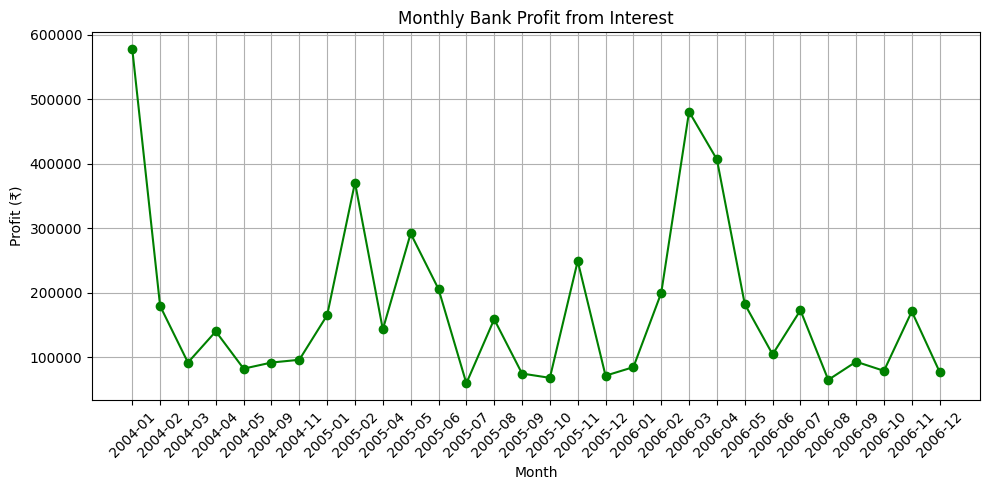

In [ ]:
import matplotlib.pyplot as plt

monthly_profit['Month'] = monthly_profit['Month'].astype(str)

plt.figure(figsize=(10, 5))
plt.plot(monthly_profit['Month'], monthly_profit['Monthly_Profit'], marker='o', color='green')
plt.title("Monthly Bank Profit from Interest")
plt.xlabel("Month")
plt.ylabel("Profit (₹)")
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


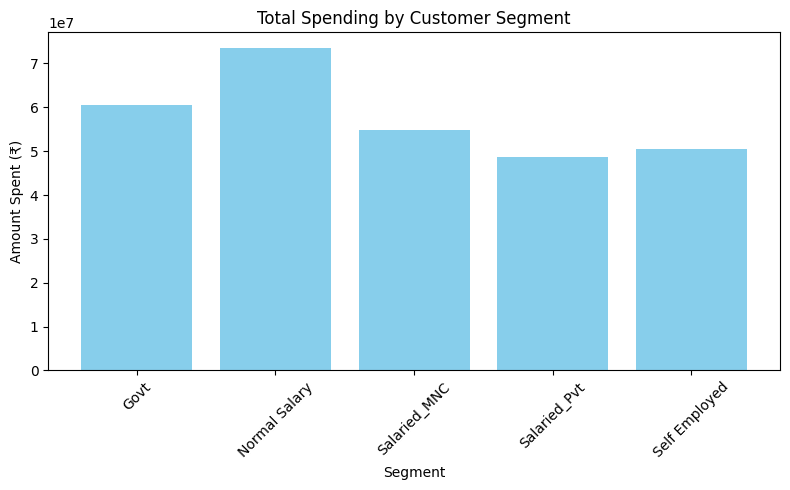

In [ ]:
plt.figure(figsize=(8, 5))
plt.bar(segment_spend['Segment'], segment_spend['Amount_Spent'], color='skyblue')
plt.title("Total Spending by Customer Segment")
plt.xlabel("Segment")
plt.ylabel("Amount Spent (₹)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


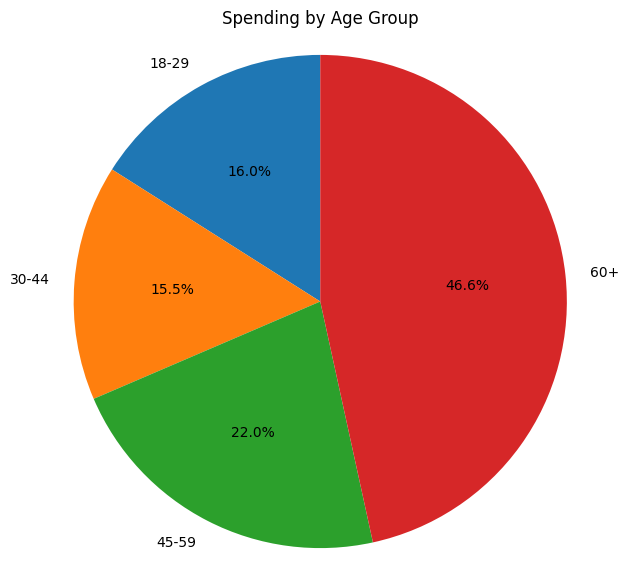

In [ ]:
plt.figure(figsize=(7, 7))
plt.pie(age_spend['Amount_Spent'], labels=age_spend['Age_Group'], autopct='%1.1f%%', startangle=90)
plt.title("Spending by Age Group")
plt.axis('equal')
plt.show()
